# Exercise 11
## or `nltk` in action

In [118]:
import nltk
nltk.download(["stopwords", "twitter_samples", "vader_lexicon"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Johannes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Johannes\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Johannes\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Before starting the actual exercise, I shall take a look at a smaller sample of the corpus and pick 3 words to work with:

In [119]:
from nltk.corpus import twitter_samples
tweets = twitter_samples.strings()

In [120]:
from nltk.tokenize import TweetTokenizer
tweettok = TweetTokenizer()

tokens_last1k = []

for tweet in tweets[len(tweets)-1000:]:
    tokens_last1k.extend(tweettok.tokenize(tweet))

In [121]:
stopwords = nltk.corpus.stopwords.words("english")
print(len(tokens_last1k))
tokens_nostop = [ token for token in tokens_last1k if token.lower() not in stopwords ]
print(len(tokens_nostop))

22409
16067


In [122]:
fd_last1k = nltk.FreqDist(tokens_nostop)
print(fd_last1k.most_common(100))

#print("\n")
#print(fd_last1k["power"])
#print(fd_last1k["right"])
#print(fd_last1k["deal"])

[(':', 881), ('RT', 666), ('.', 645), (',', 360), ('…', 332), ('SNP', 206), ('Miliband', 203), ('"', 189), ('Tories', 184), ('Cameron', 157), ('David', 135), ('Labour', 113), ('?', 107), ('Ed', 103), ('#bbcqt', 102), ('UKIP', 98), ('Farage', 96), ('...', 95), ('!', 91), ("'", 90), ('%', 78), ('-', 77), ('vote', 70), ('rather', 68), ('UK', 68), ('&', 65), ('Tory', 65), ('would', 64), ('PM', 60), ('@Nigel_Farage', 59), ('#AskNigelFarage', 58), ('#UKIP', 55), ('Nigel', 53), ('http', 51), ('tonight', 51), ('deal', 50), ('says', 50), ('TV', 50), ('Election', 50), ('/', 48), ('support', 45), ('let', 44), ('work', 42), ('Wins', 42), ('Last', 42), ('Contest', 42), ('Campaign', 42), ('Poll', 42), ('@UKIP', 40), ('want', 40), ('(', 39), ('@Ed_Miliband', 39), ('Scotland', 38), ('w', 38), ('last', 37), ('come', 36), ('claiming', 36), ('people', 35), ('man', 35), ('Clegg', 35), ('#SNP', 34), ('like', 34), ('Lab', 34), ('Prime', 34), (':/', 33), (')', 32), ('’', 31), ('Minister', 31), ('say', 30), (

I'm going to go with 'power', 'right' and 'deal'.

In [123]:
tokens_all = []

for tweet in tweets:    
    tokens.extend(tweettok.tokenize(tweet))

In [124]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

#print(tweets[10])
#print(sia.polarity_scores(tweets[10]))

tweets_power = [tweet for tweet in tweets if "power" in tweet]
tweets_right = [tweet for tweet in tweets if "right" in tweet]
tweets_deal = [tweet for tweet in tweets if "deal" in tweet]

#print(len(tweets_power))
#print(len(tweets_right))
#print(len(tweets_deal))

print(tweets_power[2])
print(sia.polarity_scores(tweets_power[2]))
print(sia.polarity_scores(tweets_power[2])["neg"])

@andytude typically we had a power cut last night and I missed it!:( was it good?
{'neg': 0.248, 'neu': 0.595, 'pos': 0.157, 'compound': -0.1759}
0.248


In [125]:
power_neg = 0
power_pos = 0
for tweet in tweets_power:
    power_neg += sia.polarity_scores(tweet)["neg"]
    power_pos += sia.polarity_scores(tweet)["pos"]
power_neg_avg = power_neg / len(tweets_power)
power_pos_avg = power_pos / len(tweets_power)

right_neg = 0
right_pos = 0
for tweet in tweets_right:
    right_neg += sia.polarity_scores(tweet)["neg"]
    right_pos += sia.polarity_scores(tweet)["pos"]
right_neg_avg = right_neg / len(tweets_right)
right_pos_avg = right_pos / len(tweets_right)

deal_neg = 0
deal_pos = 0
for tweet in tweets_deal:
    deal_neg += sia.polarity_scores(tweet)["neg"]
    deal_pos += sia.polarity_scores(tweet)["pos"]
deal_neg_avg = deal_neg / len(tweets_deal)
deal_pos_avg = deal_pos / len(tweets_deal)


#print(power_pos_avg)
#print(power_neg_avg)
#print(right_pos_avg)
#print(right_neg_avg)
#print(deal_pos_avg)
#print(deal_neg_avg)

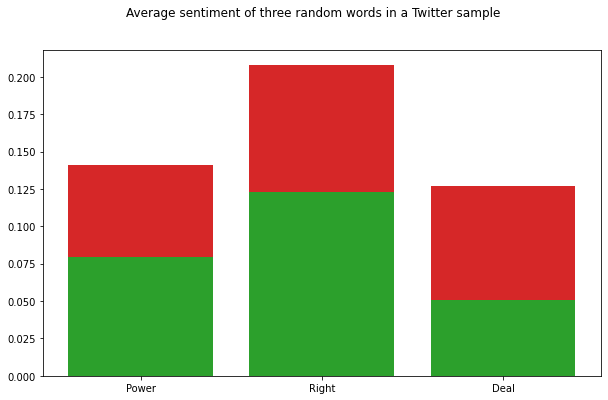

In [126]:
import matplotlib.pyplot as plt
labels = ["Power", "Right", "Deal"]
A = [power_pos_avg, right_pos_avg, deal_pos_avg]
B = [power_neg_avg, right_neg_avg, deal_neg_avg]
figure, ax = plt.subplots(1, 1, figsize=(10,6))
figure.suptitle("Average sentiment of three random words in a Twitter sample")
ax.bar(labels, A, color="tab:green")
ax.bar(labels, B, bottom = A, color="tab:red")
plt.show()